## Task 1 - Data extraction and initial analysis
### Companies: Microsoft, Tesla, and Apple

In [1]:
import pandas as pd

df = pd.read_excel('Financial-Data.xlsx', engine='openpyxl')

# Cleaning the dataset 
df = df.dropna(subset=['Company'])

numeric_columns = ['Total Revenue (in millions)', 'Net Income (in millions)', 
                   'Total Assets (in millions)', 'Total Liabilities (in millions)', 
                   'Cash Flow from Operating Activities (in millions)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df = df.sort_values(by=['Company', 'Year'])

# Converting the numbers into percentages
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue (in millions)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income (in millions)'].pct_change() * 100
df['Asset Growth (%)'] = df.groupby('Company')['Total Assets (in millions)'].pct_change() * 100
df['Liability Growth (%)'] = df.groupby('Company')['Total Liabilities (in millions)'].pct_change() * 100
df['Debt-to-Asset Ratio'] = df['Total Liabilities (in millions)'] / df['Total Assets (in millions)']
output_path = '/Users/kolev/Desktop/Updated-Financial-Data.xlsx'
df.to_excel(output_path, index=False)

print("Full DataFrame with Calculations:")
print(df)



Full DataFrame with Calculations:
     Company  Year  Total Revenue (in millions)  Net Income (in millions)  \
8      Apple  2021                       365817                     94680   
7      Apple  2022                       394328                     99803   
6      Apple  2023                       383285                     96995   
2  Microsoft  2021                       168088                     61271   
1  Microsoft  2022                       198270                     72738   
0  Microsoft  2023                       211915                     72361   
5      Tesla  2021                        53823                      5644   
4      Tesla  2022                        81462                     12587   
3      Tesla  2023                        96773                     14974   

   Total Assets (in millions)  Total Liabilities (in millions)  \
8                      351002                           287912   
7                      352755                           302083 

The NaN values for the first year of each company occur because there is no prior year for comparison.

## Top and Bottom Revenue Growth Years

In [2]:

top_revenue_years = df.loc[df.groupby('Company')['Revenue Growth (%)'].idxmax()]
bottom_revenue_years = df.loc[df.groupby('Company')['Revenue Growth (%)'].idxmin()]
print("Top Revenue Growth Years:")
print(top_revenue_years[['Company', 'Year', 'Revenue Growth (%)']])
print("\nBottom Revenue Growth Years:")
print(bottom_revenue_years[['Company', 'Year', 'Revenue Growth (%)']])


Top Revenue Growth Years:
     Company  Year  Revenue Growth (%)
7      Apple  2022            7.793788
1  Microsoft  2022           17.956071
4      Tesla  2022           51.351653

Bottom Revenue Growth Years:
     Company  Year  Revenue Growth (%)
6      Apple  2023           -2.800461
0  Microsoft  2023            6.882030
3      Tesla  2023           18.795267


Overall 2022 is the year where all companies expirienced the most growth.

## Financial Consistency

In [3]:

consistency = df.groupby('Company')[['Total Revenue (in millions)', 
                                     'Net Income (in millions)', 
                                     'Cash Flow from Operating Activities (in millions)']].std()
print("Financial Consistency (Lower values indicate higher consistency):")
print(consistency)


Financial Consistency (Lower values indicate higher consistency):
           Total Revenue (in millions)  Net Income (in millions)  \
Company                                                            
Apple                     14375.650675               2565.450513   
Microsoft                 22427.457420               6514.372802   
Tesla                     21767.879785               4846.853240   

           Cash Flow from Operating Activities (in millions)  
Company                                                       
Apple                                            9175.524127  
Microsoft                                        6718.472024  
Tesla                                            1615.685304  


Measures the variance or standard deviation of Revenue, Net Income, and Cash Flow to understand which company has the most consistent financial performance.

Apple is the most consistent performer across financial metrics, indicating a mature, stable business. Tesla, while experiencing high growth, exhibits greater volatility, characteristic of a company in a rapid expansion phase.

## Market Revenue Share (%)

In [4]:
df['Market Revenue Share (%)'] = df['Total Revenue (in millions)'] / df.groupby('Year')['Total Revenue (in millions)'].transform('sum') * 100
print(df[['Company', 'Year', 'Market Revenue Share (%)']])

     Company  Year  Market Revenue Share (%)
8      Apple  2021                 62.242568
7      Apple  2022                 58.500430
6      Apple  2023                 55.390167
2  Microsoft  2021                 28.599624
1  Microsoft  2022                 29.414295
0  Microsoft  2023                 30.624750
5      Tesla  2021                  9.157808
4      Tesla  2022                 12.085274
3      Tesla  2023                 13.985083


Apple remains the dominant player, though its share is gradually declining. Tesla is increasing its market share significantly, indicating it is capturing new market opportunities and scaling effectively.

## Profitability (%)

In [5]:
df['Profitability (%)'] = (df['Net Income (in millions)'] / df['Total Revenue (in millions)']) * 100
print(df[['Company', 'Year', 'Profitability (%)']])

     Company  Year  Profitability (%)
8      Apple  2021          25.881793
7      Apple  2022          25.309641
6      Apple  2023          25.306234
2  Microsoft  2021          36.451740
1  Microsoft  2022          36.686337
0  Microsoft  2023          34.146238
5      Tesla  2021          10.486223
4      Tesla  2022          15.451376
3      Tesla  2023          15.473324


Compares Net Income as a Percentage of Revenue to understand profitability trends. 

Microsoft leads in profitability, leveraging its efficient operations. Tesla is improving its margins, but Apple maintains a stable, consistent profit percentage.

## Correlation 

In [6]:
correlations = df[['Revenue Growth (%)', 'Net Income Growth (%)', 'Asset Growth (%)', 'Liability Growth (%)']].corr()
print("Correlation Matrix:")
print(correlations)

Correlation Matrix:
                       Revenue Growth (%)  Net Income Growth (%)  \
Revenue Growth (%)               1.000000               0.966275   
Net Income Growth (%)            0.966275               1.000000   
Asset Growth (%)                 0.814195               0.723712   
Liability Growth (%)             0.824879               0.722572   

                       Asset Growth (%)  Liability Growth (%)  
Revenue Growth (%)             0.814195              0.824879  
Net Income Growth (%)          0.723712              0.722572  
Asset Growth (%)               1.000000              0.935181  
Liability Growth (%)           0.935181              1.000000  


Check the correlation between different metrics (e.g., Revenue Growth vs. Asset Growth) for each company.

## Revenue Trends Over Time

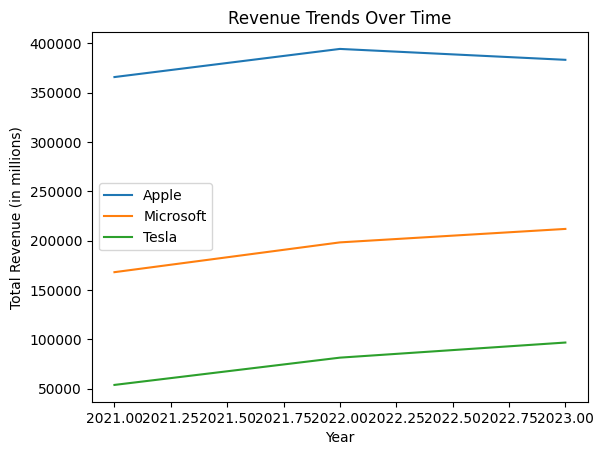

In [7]:
import matplotlib.pyplot as plt

for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Year'], subset['Total Revenue (in millions)'], label=company)

plt.title('Revenue Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue (in millions)')
plt.legend()
plt.show()


Tesla is catching up but has a long way to go before reaching the revenue scale of Apple or Microsoft.



## Debt-to-Asset Ratio

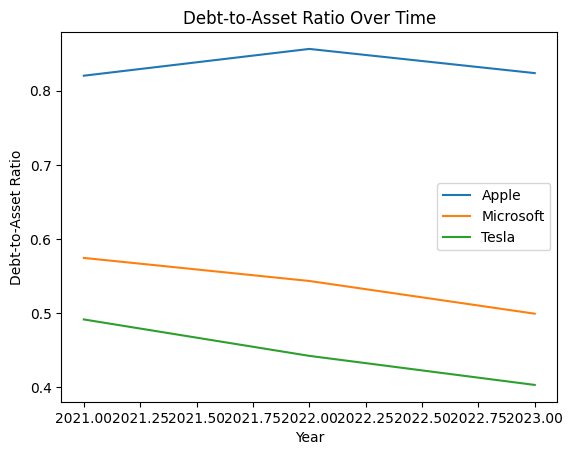

In [8]:
for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Year'], subset['Debt-to-Asset Ratio'], label=company)

plt.title('Debt-to-Asset Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Debt-to-Asset Ratio')
plt.legend()
plt.show()


Microsoft has the healthiest balance sheet in terms of debt reliance, while Tesla is rapidly improving.

## Cash Flow Efficiency

In [9]:
df['Cash Flow Efficiency'] = df['Cash Flow from Operating Activities (in millions)'] / df['Net Income (in millions)']
print(df[['Company', 'Year', 'Cash Flow Efficiency']])


     Company  Year  Cash Flow Efficiency
8      Apple  2021              1.098838
7      Apple  2022              1.223921
6      Apple  2023              1.139677
2  Microsoft  2021              1.252469
1  Microsoft  2022              1.224051
0  Microsoft  2023              1.210348
5      Tesla  2021              2.037030
4      Tesla  2022              1.169778
3      Tesla  2023              0.885268


Analyzes the relationship between Cash Flow from Operating Activities and Net Income to see how efficiently companies generate cash.

Apple and Microsoft have efficient cash generation, while Tesla’s efficiency dropped, which could be due to scaling challenges.

## Peer Comparison by Year

In [10]:
peer_comparison = df.groupby('Year')[['Total Revenue (in millions)', 'Profitability (%)', 'Debt-to-Asset Ratio']].mean()
print("Peer Comparison by Year:")
print(peer_comparison)


Peer Comparison by Year:
      Total Revenue (in millions)  Profitability (%)  Debt-to-Asset Ratio
Year                                                                     
2021                195909.333333          24.273252             0.628844
2022                224686.666667          25.815785             0.614147
2023                230657.666667          24.975265             0.575521


Compares metrics across companies in the same year.

2022 was a strong year for profitability and growth across the board, while 2023 shows signs of stabilization.



## Revenue CAGR (Compound Annual Growth Rate) 

In [11]:
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

cagr_data = []
for company in df['Company'].unique():
    subset = df[df['Company'] == company].sort_values('Year')
    start_revenue = subset['Total Revenue (in millions)'].iloc[0]
    end_revenue = subset['Total Revenue (in millions)'].iloc[-1]
    years = len(subset) - 1
    cagr = calculate_cagr(start_revenue, end_revenue, years)
    cagr_data.append({'Company': company, 'Revenue CAGR (%)': cagr})

cagr_df = pd.DataFrame(cagr_data)
print("Revenue CAGR:")
print(cagr_df)


Revenue CAGR:
     Company  Revenue CAGR (%)
0      Apple          2.359692
1  Microsoft         12.282609
2      Tesla         34.089000


Calculates the CAGR (Compound Annual Growth Rate) for Revenue and Net Income over the period for each company.

Tesla is in a high-growth phase, while Microsoft shows consistent expansion. Apple demonstrates slower growth due to its position in a more saturated market.

## Financial Health Index (FHI) 

In [12]:
df['Financial Health Index'] = (
    0.4 * df['Revenue Growth (%)'] + 
    0.4 * df['Profitability (%)'] - 
    0.2 * df['Debt-to-Asset Ratio'] * 100
)
print(df[['Company', 'Year', 'Financial Health Index']])


     Company  Year  Financial Health Index
8      Apple  2021                     NaN
7      Apple  2022               -3.885700
6      Apple  2023               -7.472506
2  Microsoft  2021                     NaN
1  Microsoft  2022               10.986554
0  Microsoft  2023                6.422715
5      Tesla  2021                     NaN
4      Tesla  2022               17.869891
3      Tesla  2023                5.639568


Creates a composite index for financial health using weighted averages of key metrics like Revenue Growth, Profitability, and Debt-to-Asset Ratio.

Microsoft consistently performs well in financial health, with balanced growth and low debt. Tesla shows strong potential but is highly dependent on sustaining its rapid growth. Apple faces challenges with declining growth and higher debt reliance

## Analysis 


### 1. Apple
•	Apple is maintaining stable financials, with modest growth in revenue, net income, and liabilities. Its conservative liability management and stable debt-to-asset ratio reflect a focus on sustainability rather than aggressive expansion. However, the company faced minor challenges in maintaining growth, evidenced by slight declines in revenue and net income in 2023 compared to 2022. These challenges may stem from market saturation, increased competition, and profitability pressures.
### 2. Microsoft
•	Microsoft is steadily growing its assets and revenue. Its low debt-to-asset ratio and consistent growth in liabilities highlight a well-balanced financial strategy. The robust asset growth demonstrates significant investments in expansion opportunities, while the proportional increase in liabilities showcases prudent financial management. Microsoft stands out as the leader in profitability and maintains the lowest debt-to-asset ratio, reflecting a strong business model and stable financial health. Its industry-leading profitability and efficiency further solidify its position.
### 3. Tesla
•	Tesla exhibits the highest volatility in growth metrics, reflecting its dynamic high-growth business model. The company is aggressively expanding its assets while managing liabilities proportionally, signaling improving financial discipline. However, Tesla’s cash flow efficiency slightly declined in 2023, suggesting potential challenges in maintaining operational efficiency during rapid scaling. While Tesla has demonstrated strong profitability and market share gains, its financial stability heavily relies on its ability to sustain this ambitious growth trajectory.




In [13]:
# Save the cleaned and processed data to a CSV file
output_path = "financial_data_processed.csv"
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")


Processed data saved to financial_data_processed.csv
